In [71]:
import numpy as np

In [72]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        
    def predict(self, X):
        return np.matmul(X, self.weights)

    def loss(self, X, Y):
        return np.average((self.predict(X) - Y) ** 2)

    def gradient(self, X, Y):
        return 2 * np.matmul(X.T, (self.predict(X) - Y)) / X.shape[0]

    def train(self, X, Y):
        self.weights = np.zeros((X.shape[1], 1))
        for i in range(self.n_iters):
            print("Iteration %4d => Loss: %.20f" % (i, self.loss(X, Y)))
            self.weights -= self.gradient(X, Y) * self.lr            
        return self.weights

In [73]:
# Trainning

y = w1x1 + w2x2 + w3x3 + b = b * 1 + w1x1 + w2x2 + w3x3 where we consider b as w0 and 1 as x0

In [74]:
x1, x2, x3, y = np.loadtxt("pizza_3_vars.txt", skiprows=1, unpack=True)
X = np.column_stack((np.ones(x1.size), x1, x2, x3))
Y = y.reshape(-1, 1)
regressor = LinearRegression(learning_rate=0.001, n_iters=300)
weights=regressor.train(X, Y)

print("\nWeights: %s" % weights)
print("\nA few predictions:")
for i in range(5):
    print("X[%d] -> %.4f (label: %d)" % (i, regressor.predict(X[i]), Y[i]))

Iteration    0 => Loss: 1333.56666666666660603369
Iteration    1 => Loss: 152.37148173674074769224
Iteration    2 => Loss: 65.17252143398701491606
Iteration    3 => Loss: 57.29348107043314541897
Iteration    4 => Loss: 55.24408375010615657175
Iteration    5 => Loss: 53.69548034496938981874
Iteration    6 => Loss: 52.25567333361470900854
Iteration    7 => Loss: 50.89073275996360479212
Iteration    8 => Loss: 49.59315053477826751305
Iteration    9 => Loss: 48.35777747932070269599
Iteration   10 => Loss: 47.18003972981339444459
Iteration   11 => Loss: 46.05577241746296834890
Iteration   12 => Loss: 44.98117392026740901656
Iteration   13 => Loss: 43.95277197431995119814
Iteration   14 => Loss: 42.96739348065430874613
Iteration   15 => Loss: 42.02213715248832670568
Iteration   16 => Loss: 41.11434870159364152187
Iteration   17 => Loss: 40.24159832491246646669
Iteration   18 => Loss: 39.40166027726749575777
Iteration   19 => Loss: 38.59249433612598778609
Iteration   20 => Loss: 37.8122289824

[[-5.69880698e-04  1.12888235e+00  1.95815830e-01  2.99481375e+00]]
[-9.0, 37.0]
[[-9. 37.]
 [-9. 37.]]
[-9. 37. -9. 37.]
[[-9.0, 2.0], [37.0, 2.0], [-9.0, 37.0], [37.0, 37.0]]


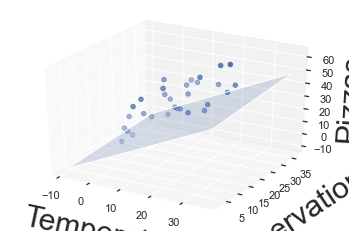

In [75]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Plot a plane that roughly approximates a dataset with two input variables.
# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure().gca(projection="3d")
ax.set_xlabel("Temperature", labelpad=15, fontsize=30)
ax.set_ylabel("Reservations", labelpad=15, fontsize=30)
ax.set_zlabel("Pizzas", labelpad=5, fontsize=30)

# Plot the data points
ax.scatter(x1, x2, y, color='b')

w=weights.T
print(w)

# Plot the plane
MARGIN = 10
edges_x = [np.min(x1) - MARGIN, np.max(x1) + MARGIN]
edges_y = [np.min(x2) - MARGIN, np.max(x2) + MARGIN]
print(edges_x)
xs, ys = np.meshgrid(edges_x, edges_y)
print(xs)
print(np.ravel(xs)) # 將 xs 拉成一維數列 
print([[x, y] for x, y in zip(np.ravel(xs), np.ravel(ys))])
zs = np.array([w[0,0] + x * w[0,1] + y * w[0,2] for x, y in
              zip(np.ravel(xs), np.ravel(ys))])
ax.plot_surface(xs, ys, zs.reshape((2, 2)), alpha=0.2)

plt.show()
